<h1 align="center">Volume 4: Total Variation.</h1>

    Marcelo Leszynski
    Section 002
    02/08/22

In [1]:
import numpy as np
from numpy.random import random_integers, uniform, randn
from numpy import linalg as la
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from imageio import imread, imwrite

# Problem 1

Using 20 x steps, 250 time steps, and a final time of .2, plot the solution that
minimizes (17.4). It should match figure 17.1.

In [2]:
def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

stability condition fails
Difference in iterations is  0.0
Final time =  0.2


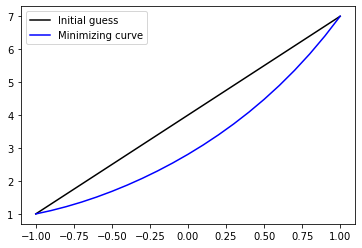

In [3]:
# initialize variables #################################################
a, b = -1., 1
alpha, beta = 1., 7.
x_steps, t_steps = 20, 250
final_T = 0.2
delta_t, delta_x = final_T/t_steps, (b-a)/x_steps
x_0 = np.linspace(a, b, x_steps + 1)

# check the stability condition ########################################
if delta_t/delta_t**2. > 0.5:
    print("stability condition fails")
    
# define initial data ##################################################
u = np.empty((2, x_steps + 1))
u[0] = (beta - alpha)/(b - a)*(x_0 - a) + alpha
u[1] = (beta - alpha)/(b - a)*(x_0 - a) + alpha

# perform iterations ###################################################
iteration = 0
while iteration < t_steps:
    rhs(u[1])
    if la.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration += 1

# print and plot results ###############################################
print("Difference in iterations is ", la.norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

guess = (beta - alpha)/(b - a)*(x_0 - a) + alpha
plt.plot(x_0, guess, 'k', label='Initial guess')
plt.plot(x_0, u[1], 'b', label='Minimizing curve')
plt.legend()
plt.show()

# Problem 2

Using 4t = 1e−3, λ = 40, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. (So Ω = [0, nx] × [0, ny], where nx and ny represent
the number of pixels in the x and y dimensions, respectively.) Take 250 steps in time. Compare
your results with Figure 17.3.

In [4]:
# create noisy grayscale img ###########################################
imagename = 'balloons_color.jpg'
changed_pixels = 40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, as_gray=True) * (1. / 255)
IM_x, IM_y = IM.shape
for lost in range(changed_pixels):
    x_,y_ = random_integers(1,IM_x-2), random_integers(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)
imwrite("noised_"+imagename, IM)

/home/celo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(1, 798 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
/home/celo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(1, 598 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[]

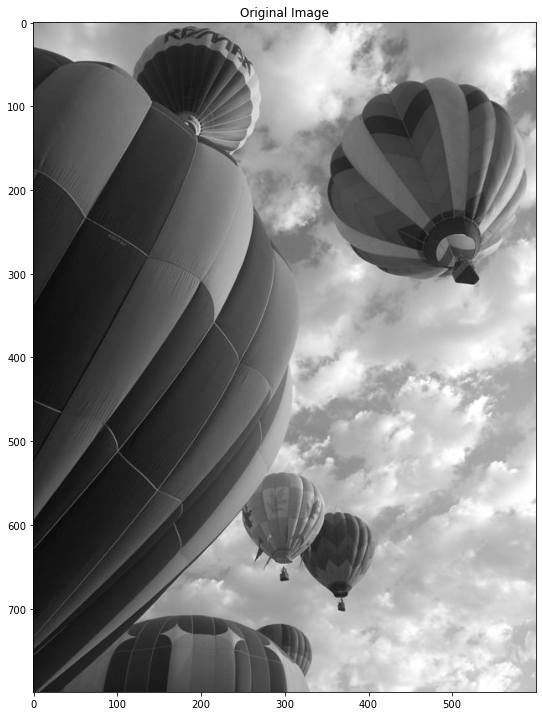

In [5]:
# initialize variables #################################################
delta_t = 1e-3
lamb = 40
t_steps = 250
u = imread('noised_balloons_color.jpg', as_gray=True) * (1./255)
f = imread('noised_balloons_color.jpg', as_gray=True) * (1./255)

# iterate through time using the EL equations ##########################
for i in range(t_steps):
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    u = delta_t*(-u+f+lamb*(u_xx+u_yy))+u

# plot results #########################################################
img_orig = imread('balloons_color.jpg', as_gray=True)
plt.figure(figsize=(9,16))
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.plot()

[]

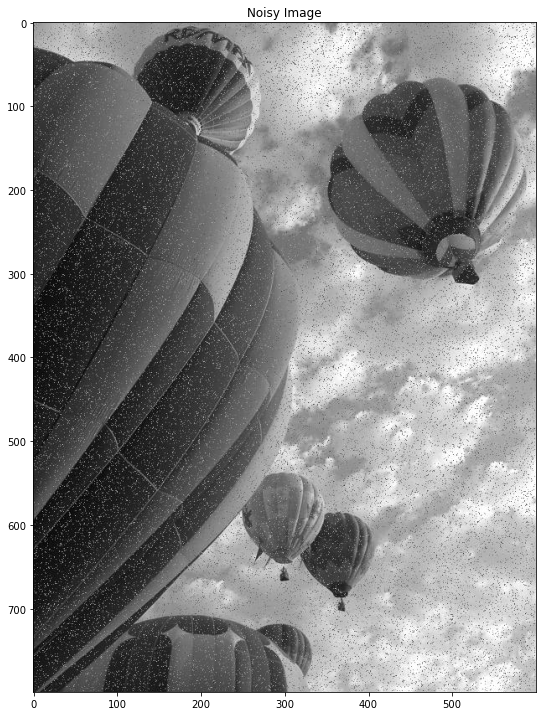

In [6]:
plt.figure(figsize=(9,16))
plt.imshow(f, cmap='gray')
plt.title('Noisy Image')
plt.plot()

[]

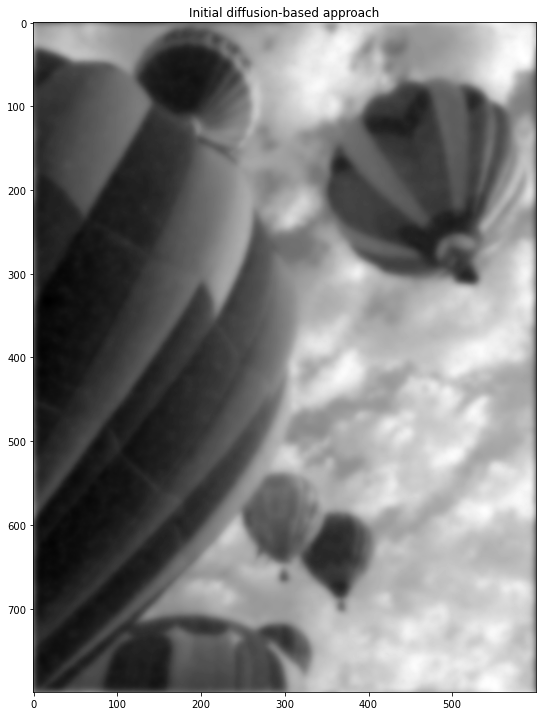

In [7]:
plt.figure(figsize=(9,16))
plt.imshow(u, cmap='gray')
plt.title('Initial diffusion-based approach')
plt.plot()

# Problem 3

Using 4t = 1e − 3, λ = 1, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. Take 200 steps in time. Compare your results with
Figure 17.3. How small should ε be?

[]

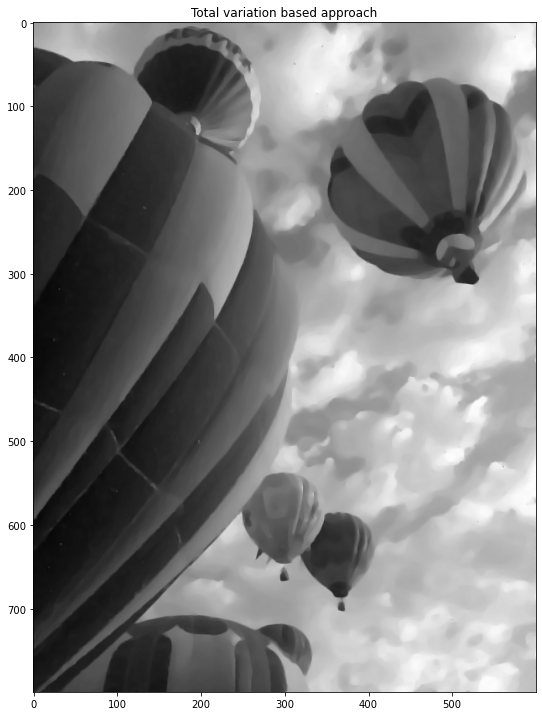

In [17]:
# initialize variables #################################################
delta_t = 1e-3
lamb = 1.
t_steps = 200
eps = 1e-5
u = imread('noised_balloons_color.jpg', as_gray=True) * (1./255)
f = imread('noised_balloons_color.jpg', as_gray=True) * (1./255)

# iterate through time using the EL equations ##########################
for i in range(t_steps):
    u_x = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2.
    u_y = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/2.
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.
    numer = u_xx*(u_y)**2 + u_yy*(u_x)**2 - 2*u_x*u_y*u_xy
    denom = (eps + (u_x**2 + u_y**2))**(3/2)
    u = delta_t*(-lamb*(u - f) + numer/denom) + u

# plot results #########################################################
plt.figure(figsize=(9,16))
plt.imshow(u, cmap='gray')
plt.title('Total variation based approach')
plt.plot()

Theoretically, $\epsilon$ could be almost as small as machine epsilon for a given system (since we want it to be as close to zero as possible). For a 32-bit numpy float, this is 1.1920929e-07. We also want to raise this to at least the (2/3) power to avoid computation errors for the operations in the denominator. For simplicity, I used $\epsilon$=1e-5. 